# Sprint 3

## Problem 1

In [1]:
import numpy as np
from numpy.random import *
import random

def _linear_hypothesis(self, X):
    a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    X = np.hstack([a ,X])
    self.Theta = np.random.random_sample((X.shape[1]+1, 1))
    self.y_ = self.Theta @ X.T
    return self.y_

## Problem 2

In [2]:
def gradient_descent(X):
    Theta = Theta - 0.01 * (error.T * X).sum() / x.shape[0]
    return Theta

In [3]:
def _gradient_descent(self, X, error):
    self.Theta = self.Theta - 0.01 * ((self.error * X).sum()) / x.shape[0]
    return self.Theta

## Problem 3

In [4]:
def predict(self, X):
    pred_y = X @ self.Theta
    return pred_y

## Problem 4, 5, 6 and 7

In [5]:
class ScratchLinearRegression:
    
    def __init__(self,num_iter,lr,bias,verbose,var=1):
        
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter+1)
        self.val_loss = np.zeros(self.iter+1)
        self.var=var
        
        
    def fit(self,X,y,X_val=None, y_val=None):
        
        #Training Process - Learning
        
        #Defining the Theta, linear hypothesis and loss to be recorded
        self.theta_list = np.zeros((self.iter+1,X.shape[1]+1))
        self._linear_hypothesis(X)
        init_error = self.calc_error(X,y)
        self.loss[0] = np.sum(init_error**2) /(2 * X.shape[0])
        if X_val is not None:
            init_val_error= self.calc_error(X_val,y_val)
            self.val_loss[0] = np.sum(init_val_error**2)/(2 * X_val.shape[0])
        
        #Going through the number of iteration, calculating the error and keep on optimizing it with the 
        #gradient descent optimization algorithm
        for n in range(self.iter):
            error = self.calc_error(X,y)
            loss = self._gradient_descent(X,error)
            self.theta_list[n+1] = self.theta
            self.loss[n+1] = loss
            
            if X_val is not None:
                val_error = self.calc_error(X_val,y_val)
                val_loss = np.sum(val_error**2) /(2*X_val.shape[0])
                self.val_loss[n+1]=val_loss
        
    def predict(self,X):
        
        #Prediction for both cases: when the bias is included or not
        if self.bias == True:
            ret_val = np.dot(X,self.theta[:-1]) + self.theta[-1]
        else:
            ret_val = np.dot(X,self.theta)
        
        return ret_val
    
    def _linear_hypothesis(self,X):
        if self.bias:
            self.theta = np.random.randn(X.shape[1]+1)*self.var
            self.theta_list[0] =self.theta
        else:
            self.theta = np.random.randn(X.shape[1])
            
    def _gradient_descent(self, X,error):
        
        #gradient descent optimization algorithm
        loss = np.sum(error**2) /(2 * X.shape[0])
        loss1 = np.dot(error.T,X)/X.shape[0]
        if self.bias:
            self.theta[:-1] =self.theta[:-1] - self.lr * loss1
            self.theta[-1] = self.theta[-1] - (self.lr * np.sum((error/X.shape[0])))
        else:
            self.theta = self.theta - self.lr * loss1
        return loss
        
        
    def calc_error(self,X,y):
        #Calculation of the error
        error = self.predict(X) - y
        return error   

In [6]:
def MSE(y_pred, y):
    mse = ((y_pred - y) ** 2).sum() / X.shape[0]
    return mse

- Now let's test with the data of House Prices.

In [7]:
import pandas as pd
df = pd.read_csv("train.csv")

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
from sklearn.model_selection import train_test_split
x = np.array(df.loc[:,'GrLivArea'])
y = np.array(df.loc[:,'SalePrice'])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
slr = ScratchLinearRegression(num_iter=5000, lr=0.000000001, bias=True, verbose=False)
slr.fit(x_train.reshape(-1,1),y_train,x_test.reshape(-1,1),y_test)
print(type(slr))
y_pred = slr.predict(x.reshape(-1,1))
print(y_pred)

<class '__main__.ScratchLinearRegression'>
[201684.84882054 148845.87088111 210648.6040067  ... 275989.66154787
 127144.14779884 148138.20599799]


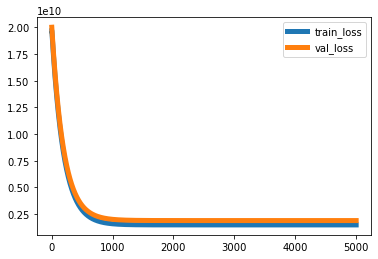

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(slr.loss)+1),slr.loss,label='train_loss',linewidth=5)
plt.plot(np.arange(1,len(slr.val_loss)+1),slr.val_loss,label='val_loss',linewidth=5)
plt.legend()

## Problem 8 (Advance Task - Optional)

No bias

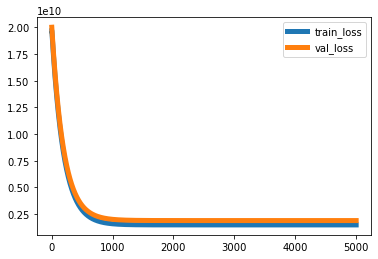

In [14]:
slr2 = ScratchLinearRegression(num_iter=5000, lr=0.000000001, bias=False, verbose=False)
slr2.fit(x_train.reshape(-1,1),y_train,x_test.reshape(-1,1),y_test)
y_pred = slr2.predict(x.reshape(-1,1))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,len(slr2.loss)+1),slr.loss,label='train_loss',linewidth=5)
plt.plot(np.arange(1,len(slr2.val_loss)+1),slr.val_loss,label='val_loss',linewidth=5)
plt.legend()


In [15]:
slr2.theta.shape

(1,)

In [16]:
slr.theta.shape

(2,)

## Problem 9 (Advance Task - Optional)

- We will use the cube and see how the results change

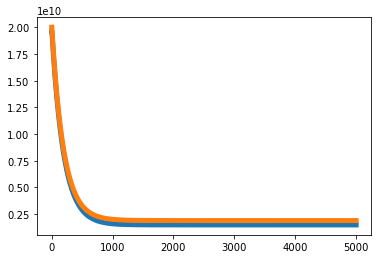

In [17]:
x_train3,x_test3 = x_train**3,x_test**3
lr_power = 0.0000000000000000000001
num_iter=5000
verbose=False
bias=True
slr3=ScratchLinearRegression(num_iter,lr_power,bias,verbose)
slr3.fit(x_train3.reshape(-1,1),y_train, x_test3.reshape(-1,1),y_test)
plt.plot(np.arange(1,len(slr3.loss)+1),slr.loss,label='train_loss',linewidth=5)
plt.plot(np.arange(1,len(slr3.val_loss)+1),slr.val_loss,label='val_loss',linewidth=5)